In [1]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image
from nltk.corpus import stopwords

In [6]:
ballerina_df = pd.read_csv('ballerina_final_df.csv')

ballerina_word_df = ballerina_df.drop(['Unnamed: 0.1','Unnamed: 0','User_IDs'], axis=1)

ballerina_word_df.head(3)

,Timestamps,Reviews,Dates,Vader_Score,Vader_Sentiment
0,2d,An interesting new look at the dark underworld...,2025-12-13,0.5423,Positive
1,4d,Fun...just fun. Well put together certainly wo...,2025-12-11,0.8271,Positive
2,5d,8.5/10 One of the best movies this year i have...,2025-12-10,0.6369,Positive


## Word Cloud

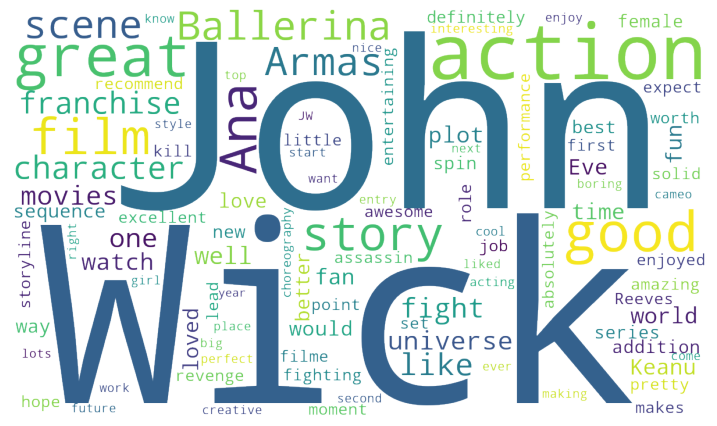

In [32]:
ballerina_word_df['Reviews'] = ballerina_word_df['Reviews'].replace(np.nan, '', regex=True)

reviews = ' '.join(ballerina_word_df['Reviews'])

stop = set(stopwords.words('english'))

custom_stopwords = ['e', 'made', 'felt', 'feel', 'could', 'seen', 'lot', 'though', 'much', 'really',
                    'still', 'go', 'que', 'main', 'done', 'thing', 'make', 'deliver', 'la', 'movie',
                    'bit', 'also', 'however', 'take', 'delivers', 'part', 'bad', 'enough', 'packed',
                    'another', 'every', 'watching', 'get', 'especially', 'end', 'need', 'going', 'wait',
                    'quite', 'para', 'é', 'without', 'overall', 'see', 'even', 'thought', 'long', 'line',
                    'never', 'guy', 'think', 'give', 'say', 'keep', 'face', 'back', 'last', 'nothing',
                    'seeing', 'takes', 'es', 'de', 'many']

extended_stopwords = stop.union(custom_stopwords)

# mask1 = np.array(Image.open("bubble_crop2.png"))

# mask1[mask1 == 0] = 255

ballerina_wordcloud = WordCloud(width=1200, height=700, max_words=100, stopwords=extended_stopwords , background_color="rgba(255, 255, 255, 0)", mode="RGBA", collocations=False).generate(reviews)

ballerina_wordcloud.words_

# Display the generated image:
plt.figure(figsize=(9,9))
plt.imshow(ballerina_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [33]:
ballerina_wordcloud_frequency = ballerina_wordcloud.words_

ballerina_wordcloud_frequency_df = pd.DataFrame(list(ballerina_wordcloud_frequency.items()), columns=['Words', 'Frequency']) 

ballerina_top10 = ballerina_wordcloud_frequency_df.sort_values('Frequency', ascending=False).head(10)

ballerina_top10

,Words,Frequency
0,Wick,1.000000
1,John,0.870924
2,action,0.697011
3,great,0.354620
4,good,0.316576
5,Ana,0.273098
6,film,0.256793
7,story,0.233696
8,Ballerina,0.233696
9,Armas,0.228261
